<a href="https://colab.research.google.com/github/CarolleGoda/linear_regressions/blob/master/simple_linear_reg_ozone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Programmer une regression lineaire simple.
## Dataset:Ozone
## Projet: Prédire le pic d'ozone en fonction de la température à midi

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## This is the link to the dataset
## https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/Cours_realisez_des_modelisations_performantes/NOUVEAU/Dataset_ozone.txt

In [4]:
# Chargement du dataset
ozone = pd.read_csv('https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/Cours_realisez_des_modelisations_performantes/NOUVEAU/Dataset_ozone.txt', sep=';', decimal=',')
ozone.head()

,obs,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,vent,pluie
0,601,87,15.6,18.5,18.4,4,4,8,0.6946,-1.7101,-0.6946,84,Nord,Sec
1,602,82,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87,Nord,Sec
2,603,92,15.3,17.6,19.5,2,5,4,2.9544,1.8794,0.5209,82,Est,Sec
3,604,114,16.2,19.7,22.5,1,1,0,0.9848,0.3473,-0.1736,92,Nord,Sec
4,605,94,17.4,20.5,20.4,8,8,7,-0.5000,-2.9544,-4.3301,114,Ouest,Sec


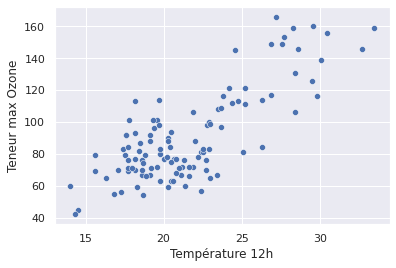

In [5]:
#Nuage de points
sns.set()

ax = sns.scatterplot(x="T12", y="maxO3", data=ozone)
ax.set(xlabel='Température 12h', ylabel='Teneur max Ozone')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))


## D'après le nuage de points, Il existe une corrélation linéaire entre nos variables.
## Effectuons une regression simple

In [6]:
reg_simp = smf.ols('maxO3 ~ T12', data=ozone).fit()
reg_simp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  maxO3   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     175.8
Date:                Mon, 17 May 2021   Prob (F-statistic):           1.51e-24
Time:                        11:19:19   Log-Likelihood:                -478.91
No. Observations:                 112   AIC:                             961.8
Df Residuals:                     110   BIC:                             967.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.4196      9.033     -3.035      0.003     -45.322      -9.517
T12            5.4687      0.412     13.258      0.000       4.651       6.286
==============================================================================
Omnibus:                        1.154   Durbin-Watson:                   1.101
Prob(Omnibus):                  0.562   Jarque-Bera (JB):                1.242
Skew:                           0.196   Prob(JB):                        0.537
Kurtosis:                       2.664   Cond. No.                         119.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Traçons la droite de regression

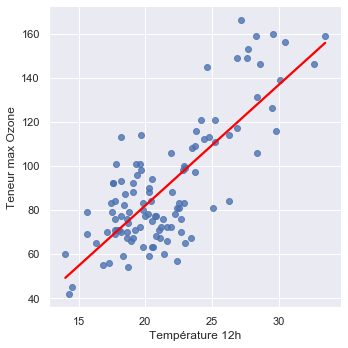

In [ ]:
ax = sns.lmplot(x="T12", y="maxO3", data=ozone, ci=None, line_kws={'color':'red'})
ax.set(xlabel='Température 12h', ylabel='Teneur max Ozone')

## Valeurs ajustées et residus


## Les residus du modèle


In [8]:
ozone['residu_s'] = reg_simp.resid
print(reg_simp.resid)

0      13.248966
1       8.795834
2      23.170782
3      33.686544
4       9.311596
         ...    
107    14.623914
108    -9.329009
109     0.639884
110     2.139675
111    -4.297903
Length: 112, dtype: float64


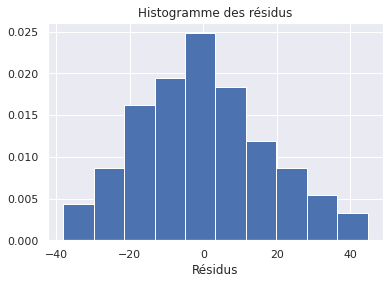

In [9]:
plt.hist(ozone['residu_s'], density=True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
plt.show()

### Prévoyons maintenant la concentration en ozone d'une journée. Sachant que la température prévue de cette journée est de 19 °C, on peut utiliser notre modèle de régression à des fins de prévision !

In [11]:
a_prevoir = pd.DataFrame({'T12':[19]})

maxO3_prev = reg_simp.predict(a_prevoir)
print(round(maxO3_prev[0], 2))

76.49
